In [4]:
import requests
import spotlight
import unicodedata
import NHStextNLPprocessAPIv1 as nhsnlp

NHSsearchAPI is loaded!


In [18]:
from lxml import html
from collections import namedtuple
from dateutil.parser import parse
from collections import OrderedDict
import urllib, json
import urllib.request
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [252]:
from rdflib import Graph, Literal, BNode, Namespace, RDF, URIRef
from rdflib.namespace import DC, FOAF
import spotlight
import urllib, json
import pandas as pd

In [251]:
import os.path
from os import path

In [290]:
cn = Namespace("http://nhscausalknowledgegraph.org/condtion/")
owl = Namespace("http://www.w3.org/2002/07/owl#")

In [758]:
#Semantic instance generation example
semantic_lifting_pipeline('syphilis')

***** overview *****
 ['Syphili', 'Infection', 'Sex', 'Someone', 'Get', 'Think', 'Cause', 'Problem', 'Course', 'Antibiot', 'Schizophrenia', 'Pathogenic_bacteria', 'Sexually_transmitted_infection', 'Erectile_dysfunction', 'Sewage_treatment', 'You', 'Cure', 'Antibiotics', 'Caught', 'Short_film', 'Sexual_intercourse', 'Syphilis']
***** symptoms *****
 ['Symptom', 'Get', 'People', 'Sore', 'Ulcer', 'Vagina', 'Place', 'Rash', 'Hand', 'Feet', 'Growth', 'Wart', 'Women', 'Anu', 'Men', 'Patch', 'Headach', 'Pain', 'Temperature', 'Fever', 'Gland', 'Armpit', 'Year', 'Spread', 'Brain', 'Part', 'Body', 'Term', 'Problem', 'Syphilis', 'Arthralgia', 'Vulva', 'Headache', 'Groin', 'Anus', 'Axilla', 'Buttocks', 'Fatigue_(medical)', 'Erectile_dysfunction', 'The', 'Missing_person', 'Erythema', 'Thermoregulation', 'Parts-per_notation', 'Neck', 'Mouth', 'Cutaneous_condition', 'If_(magazine)', 'Human_body', 'Genital_wart', 'Michael_Jackson', 'Infection', 'Human_skin', 'White']
***** affected *****
 []
***** cau

1

In [656]:
#semantic data matach
def semantic_lifting_pipeline(topic):
    tag_anno=nhsnlp.web_text_nlp_pipeline(topic)
    dicterm={}
    keys = []
    plurs=['a','e','i','o','u']
    for i in range(0,7):
        print (i*15,'%')
        for ta in tag_anno[i]:
            if ta == 'Flu':
                ta = 'Influenza'
            if ta == 'Temperature':
                ta = 'Fever'
            if ta == 'Chest':
                ta = 'Thorax'
            if ta == 'Vomit':
                ta = 'Vomiting'
            if ta == 'ventilator':
                ta = 'Medical_ventilator'
            if ta == 'Diabet':
                ta ='Diabetes_mellitus'
            if ta == 'Respiratory':
                ta ='Respiratory_system'
            if ta not in keys:
                keys.append(ta)
                term_type = db_term_type(ta)
                if term_type == '' and ta[-1] in plurs:
                    term_type = db_term_type(ta+'s')
                    if not term_type =='' and ta+'s' not in keys:
                        dicterm[ta+'s'] = term_type
                else:
                    if not term_type =='':
                        dicterm[ta]=term_type
    print ('100%')
    return graph_generation(dicterm,topic)

In [267]:
#dicterm

In [263]:
#topic = 'pneumonia'

In [248]:
def db_term_type(dbp_k):
    flag = ''
    dbpdialink = 'http://dbpedia.org/data/'+dbp_k+'.json'
    if dbp_k in ['Summer','Spring','Autumn','Winter']:
        flag = 'Season'
        return flag
    if dbp_k in ['Blood_test']:
        flag = 'Medical_diagnosis'
        return flag
    if dbp_k.split('_')[-1]=='medicine':
        flag = 'Medical_treatments'
        return flag
    with urllib.request.urlopen(dbpdialink) as url:
        jicdata = json.loads(url.read())
        if 'http://dbpedia.org/resource/'+dbp_k not in jicdata:
            return flag
        else:
            firstkey=jicdata['http://dbpedia.org/resource/'+dbp_k]
            #print(firstkey)
            if 'http://dbpedia.org/property/years' in firstkey:
                #print(1)
                flag = 'AgeGroup'
                return flag
            if 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type' in firstkey or 'http://purl.org/dc/terms/subject' in firstkey:
                secondkey=[]
                if 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type' in firstkey:
                    secondkeylist = firstkey['http://www.w3.org/1999/02/22-rdf-syntax-ns#type']
                    for keylist in secondkeylist:
                        secondkey.append(keylist['value'])
                    #print (dbp_k)
                    #print (secondkey)
                if 'http://umbel.org/umbel/rc/AilmentCondition' in secondkey:
                    flag = 'Symptom'
                    return flag
                if 'http://dbpedia.org/ontology/Disease' in secondkey:
                    if 'pain' in dbp_k.split('_'):
                        flag = 'Symptom'
                    else:
                        flag = 'Disease'
                    return flag
                if 'http://dbpedia.org/ontology/AnatomicalStructure' in secondkey:
                    flag = 'AnatomicalStructure'
                    return flag
                if 'http://dbpedia.org/ontology/Drug' in secondkey:
                    if dbp_k=='Adult': 
                        flag = 'AgeGroup'
                    else:
                        flag = 'Drug'
                    return flag
                if 'http://dbpedia.org/ontology/Food' in secondkey:
                    flag = 'Medical_treatments'
                    return flag
                if 'http://dbpedia.org/class/yago/Intervention101240210' in secondkey:
                    flag = 'Medical_diagnosis'
                    return flag
                if 'http://dbpedia.org/ontology/Species' in secondkey:
                    flag = 'Species'
                    return flag
                if 'http://umbel.org/umbel/rc/MusicSingle' in secondkey:
                    flag = 'Symptom'
                    return flag
                #if 'http://dbpedia.org/class/yago/Relation100031921' in secondkey:
                    #print (3)
                    #flag = 'AgeGroup'
                    return flag
                #if 'http://dbpedia.org/ontology/Device' in secondkey:
                 #   flag = 'Medical_diagnosis'
                  #  return flag
                
                if flag =='':
                    if 'http://dbpedia.org/property/field' in firstkey:
                        secondkey = firstkey['http://dbpedia.org/property/field']
                        for typei in secondkey:
                            #print (typei)
                            if typei['value'].split('/')[-1] in ['Infectious_disease_(medical_specialty)','Disease']:
                                flag = 'Disease'
                                return flag
                if flag =='':
                    if 'http://dbpedia.org/property/diseasesdb' in firstkey:
                        flag = 'Symptom'
                        return flag
                if flag =='':
                    #print(dbp_k)
                    if 'http://purl.org/dc/terms/subject' in firstkey:
                            secondkey=[]
                            secondkeylist = firstkey['http://purl.org/dc/terms/subject']
                            #print (secondkeylist)
                            for keylist in secondkeylist:
                                if 'Traditional_medicine' in keylist['value'].split(':')[-1]:
                                    flag = 'Medical_treatments'
                                    return flag
                                if keylist['value'].endswith('therapy') or keylist['value'].endswith('treatments'):
                                    flag = 'Medical_treatments'
                                    return flag
                                if '_treatments' in keylist['value'].split('/')[-1]:
                                    flag = 'Medical_treatments'
                                    return flag
                                if '_drugs' in keylist['value'].split('/')[-1]:
                                    flag = 'Drug'
                                    return flag
                                if 'Category:Medical_tests' in keylist['value'].split('/')[-1]:
                                    flag = 'Medical_diagnosis'
                                    return flag
                                if 'Category:Medical_equipment' in keylist['value'].split('/')[-1]:
                                    flag = 'Medical_diagnosis'
                                    return flag
                                if 'drugs' in keylist['value'].split('/')[-1].split('_')[-1]:
                                    flag = 'Drug'
                                    return flag
                                if 'Antibiotics' in keylist['value'].split('/')[-1]:
                                    flag = 'Drug'
                                    return flag
                                #_tests
                                #_equipment
                                #http://dbpedia.org/page/Category:Symptoms_and_signs:_Respiratory_system
                                #Category:Symptoms_and_signs:_Respiratory_system
                                if keylist['value'].startswith('http://dbpedia.org/page/Category:Symptoms_and_signs'):
                                    flag = 'Symptom'
                                #http://dbpedia.org/page/Category:Human_body
                                #print(keylist['value'].split(':')[-1])
                                #http://dbpedia.org/page/Category:Respiratory_system
                               # print(keylist['value'].split(':')[-1])
                                if 'Category:Respiratory_system' in keylist['value'].split(':')[-1]:
                                    flag = 'AnatomicalStructure'
                                    return flag
                                if '_Respiratory_system' in keylist['value'].split(':')[-1]:
                                    flag = 'Symptom'
                                    return flag
                                #print(keylist['value'].split(':')[2])
                                if 'Symptoms_and_signs' in keylist['value'].split(':')[2]:
                                    flag = 'Symptom'
                                    return flag
                                #http://dbpedia.org/page/Category:Habits
                                #http://dbpedia.org/page/Category:Symptoms_and_signs:_Digestive_system_and_abdomen
                                #http://dbpedia.org/page/Category:Symptoms_and_signs:_Cognition,_perception,_emotional_state_and_behaviour
                                if keylist['value'].endswith('Human_body'):
                                    flag = 'AnatomicalStructure'
                                    return flag
                                if keylist['value'].endswith('Category:Human_physiology') or keylist['value'].endswith('Category:Body_fluids'):
                                    flag = 'Human_physiology'
                                    return flag
                                if keylist['value'].endswith('Category:Habits'):
                                    flag = 'Habits'
                                    return flag
                                if keylist['value'].endswith('Category:Rare_diseases'):
                                    flag = 'Symptom'
                                    return flag
                                #http://dbpedia.org/page/Category:Rare_diseases
                                #print(keylist['value'].split(':')[-1])
                                #http://purl.org/linguistics/gold/hypernym
                                if keylist['value'].split(':')[-1] in ['Ageing', 'Human_development','Developmental_psychology','Infancy','Youth','Adulthood']:
                                    #print (5)
                                    flag = 'AgeGroup'
                                    return flag
                                if keylist['value'].split(':')[-1] in ['Sex','Females','Males']:
                                    flag = 'Gender'
                                    return flag        
            else:
                #print(firstkey)
                if 'http://dbpedia.org/property/field' in firstkey:
                    secondkey = firstkey['http://dbpedia.org/property/field']
                    for typei in secondkey:
                        #print (typei)
                        if typei['value'].split('/')[-1] in ['Infectious_disease_(medical_specialty)','Disease', 'Pediatrics']:
                            flag = 'Symptom'
                            return flag
                if flag =='':
                    if 'http://dbpedia.org/property/diseasesdb' in firstkey:
                        flag = 'Symptom'
                        return flag
    return flag

In [1515]:
#function that generating individual disease CPKG triples

In [301]:
def graph_generation(rk,t):
    t=t.capitalize() 
    sdg = Graph()
    causes = URIRef(cn.causesDisease)
    anatomicOn = URIRef(cn.causeOnAnatomicStructure)
    drug = URIRef(cn.drugTo)
    diag = URIRef(cn.diagnosisTo)
    symptomOf = URIRef(cn.causesSymptom)
    treatment = URIRef(cn.treatmentTo)
    #question=  URIRef(cn.question)
    seasonOf = URIRef(cn.seasonAffectTo)
    #anabout = URIRef(cn.aLabel)
    sameAs = URIRef(owl.sameAs)
    agegroup = URIRef(cn.causesAffectionToAgeGroup)
    physiologyOf = URIRef(cn.causesPhysiology)
    habitTo = URIRef(cn.HabitCausesTo)
    speciesTo = URIRef(cn.SpeciesCausesTo)
    disease = URIRef('http://dbpedia.org/ontology/Disease')
    wikidisease = URIRef('https://www.wikidata.org/wiki/Q12136')
    anat = URIRef('http://dbpedia.org/ontology/AnatomicalStructure')
    wikianat = URIRef('https://www.wikidata.org/wiki/Q4936952')
    symp = URIRef('http://dbpedia.org/resource/Category:Symptoms_and_signs')
    presign = URIRef('http://purl.org/dc/terms/subject')
    drugs = URIRef('http://dbpedia.org/ontology/Drug')
    condition = URIRef('http://umbel.org/umbel/rc/AilmentCondition')
    diseaseProperty = URIRef('http://dbpedia.org/property/diseasesdb')
    diags = URIRef('http://dbpedia.org/page/Medical_diagnosis')
    treats = URIRef('http://dbpedia.org/page/Therapy')
    ages = URIRef('http://dbpedia.org/page/Category:Human_development')
    sex = URIRef('http://dbpedia.org/page/Category:Sex')
    season = URIRef('http://dbpedia.org/page/Season')
    species = URIRef('http://dbpedia.org/ontology/Species')
    physiology = URIRef('http://dbpedia.org/page/Category:Human_physiology')
    habit = URIRef('http://dbpedia.org/page/Category:Habits')
    conditionname = t.split(',')
    #setting disease namespace
    rsub = URIRef('https://www.nhs.uk/conditions/'+t)
    dbpt = t.replace('-','_')
    rsame = URIRef('http://dbpedia.org/page/'+dbpt)
    sdg.add( (rsub, sameAs, rsame) )               
    #setting graph path and formate
    filepath=''
    if t!='':
        filepath='cknns/'+t+'.ttl'
    else:
        filepath='cknns/error.ttl'
    sdg.add( (rsub, RDF.type, disease) ) 
    # if the graph is exist, read it
    if path.exists(filepath):
        sdg.parse(filepath, format="ttl")
    # adding ontology
    #sdg.add( (disease, symptomOf, symp) )
    #sdg.add( (disease, symptomOf, disease) )
    #sdg.add( (disease, causes, disease) )
    #sdg.add( (disease, causes, anat) )
    #sdg.add( (drugs, drug, disease) )
    #sdg.add( (diags, diag, disease) )
    # go through the Noun tokens libraries
    for rterm, rtype in rk.items():
        if rtype == 'Symptom':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, symp) )
            sdg.add( (rsub, symptomOf, robj) )
        elif rtype == 'Disease':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, disease) )
            sdg.add( (robj, causes, rsub) )
            sdg.add( (rsub, symptomOf, robj) )
        elif rtype == 'AnatomicalStructure':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, anat) )
            sdg.add( (rsub, anatomicOn, robj) )
        elif rtype == 'Drug':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, drugs) )
            sdg.add( (robj, drug, rsub) )
        elif rtype == 'Medical_diagnosis':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, diags) )
            sdg.add( (robj, diag, rsub) )
        elif rtype == 'Medical_treatments':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, treats) )
            sdg.add( (robj, treatment, rsub) )
        elif rtype == 'AgeGroup':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, ages) )
            sdg.add( (rsub, agegroup, robj) )
        elif rtype == 'Gender':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, sex) )
            sdg.add( (rsub, agegroup, robj) )
        elif rtype == 'Human_physiology':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, physiology) )
            sdg.add( (rsub, physiologyOf, robj) )
        elif rtype == 'Season':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, season) )
            sdg.add( (robj, seasonOf, rsub) )
        elif rtype == 'Habits':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, habit) )
            sdg.add( (robj, habitTo, rsub) )
        elif rtype == 'Species':
            robj = URIRef('http://dbpedia.org/page/'+rterm)
            sdg.add( (robj, RDF.type, species) )
            sdg.add( (robj, speciesTo, rsub) )
            
     # ntriples, n3, turtle   
    #print (sdg.serialize(format='turtle'))
    if t!='':
        sdg.serialize(destination=filepath, format='turtle')
        sdg.close()
        return 1
    else:
        return 0

In [766]:
#check if all the created files are validated
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('cknns') if isfile(join('cknns', f))]
onlyfiles

['Abdominal-aortic-aneurysm.ttl',
 'Abscess.ttl',
 'Achalasia.ttl',
 'Acne.ttl',
 'Acoustic-neuroma.ttl',
 'Acromegaly.ttl',
 'Acute-cholecystitis.ttl',
 'Acute-kidney-injury.ttl',
 'Acute-lymphoblastic-leukaemia.ttl',
 'Acute-myeloid-leukaemia.ttl',
 'Acute-pancreatitis.ttl',
 'Acute-respiratory-distress-syndrome.ttl',
 'Addisons-disease.ttl',
 'Adenoids-and-adenoidectomy.ttl',
 'Agoraphobia.ttl',
 'Air-embolism.ttl',
 'Albinism.ttl',
 'Alcohol-related-liver-disease-arld.ttl',
 'Allergic-rhinitis.ttl',
 'Allergies.ttl',
 'Alzheimers-disease.ttl',
 'Amyloidosis.ttl',
 'Anal-cancer.ttl',
 'Anal-fistula.ttl',
 'Androgen-insensitivity-syndrome.ttl',
 'Angina.ttl',
 'Angioedema.ttl',
 'Ankylosing-spondylitis.ttl',
 'Anorexia.ttl',
 'Antiphospholipid-syndrome.ttl',
 'Anxiety-disorders-in-children.ttl',
 'Arthritis.ttl',
 'Asbestosis.ttl',
 'Asthma.ttl',
 'Astigmatism.ttl',
 'Atherosclerosis.ttl',
 'Attention-deficit-hyperactivity-disorder-adhd.ttl',
 'Autosomal-dominant-polycystic-kidney-di

In [1516]:
#Merging all 383 files to a global nhs caulsal knoweldge graph

In [928]:
glgraph = Graph()
i = 0
for f in onlyfiles:
    filepath='cknns/'+f
    glgraph.parse(filepath,format='turtle')
    i=i+1
    print (i)
glgraph.serialize(destination='cknns/'+'nhskg', format='turtle')
glgraph.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [1137]:
#clean files
#glgraph = Graph()
#glgraph.parse('cknns/nhskg',format='turtle')
#rsub = URIRef('http://dbpedia.org/page/Management')
#drugs = URIRef('http://dbpedia.org/ontology/Drug')
#drug = URIRef(cn.drugTo)
#treatment = URIRef(cn.treatmentTo)
#causes = URIRef(cn.causesDisease)
#symptomOf = URIRef(cn.causesSymptom)
#agegroup = URIRef(cn.causesAffectionToAgeGroup)
#ages = URIRef('http://dbpedia.org/page/Category:Human_development')
#sex = URIRef('http://dbpedia.org/page/Category:Sex')
#glgraph.remove((rsub, drug, None)) # clearn up some unvaluable triples
#glgraph.remove((rsub, RDF.type, disease)) # clearn up some unvaluable triples
#glgraph.serialize(destination='cknns/'+'nhskg', format='turtle')
#glgraph.close()

In [1003]:
#Knowledge graph evaluation

In [1138]:
#Diseases triple evaluation
disease = URIRef('http://dbpedia.org/ontology/Disease')
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d WHERE {?d <"+RDF.type+"> <"+disease+"> . }"
qres = g.query(querystring)
print('total disease number: ',len(qres)) 
print('UK NHS disease number: ',383)
print('DBpedia disease number: ',len(qres)-383)
g.close()

SELECT DISTINCT ?d WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> . } does not look like a valid URI, trying to serialize this will break.


total disease number:  801
UK NHS disease number:  383
DBpedia disease number:  418


In [1139]:
causes = URIRef(cn.causesDisease)
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?cd WHERE {?d <"+RDF.type+"> <"+disease+"> . "
querystring = querystring+"?d <"+causes+"> ?cd .}" 
qres = g.query(querystring)
#print (qres)
d = {}
for row in qres:
    di = str(row.asdict()['d'].toPython()).split('/')[-1]
    cdi = str(row.asdict()['cd'].toPython()).split('/')[-1]
    if di not in d:
        cd = []
        cd.append(cdi)
        d[di]=cd
    else:
        x = d[di]
        x.append(cdi)
        d[di]=x
g.close()

SELECT DISTINCT ?d ?cd WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?cd WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?cd WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?cd WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?cd WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> .  does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?cd WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> . ?

In [1140]:
df = pd.DataFrame(d.items(), columns=['D', 'CD'])
df['Length'] = df['CD'].str.len()

In [1141]:
k=df.sort_values(by=['Length']).iloc[-25:]
k

,D,CD,Length
73,Visual_perception,"[Uveitis, Diabetic-retinopathy, Lazy-eye, Acro...",23
118,Stroke,"[Subdural-haematoma, Air-embolism, Cardiovascu...",26
42,Stiffness,"[Multiple-sclerosis, Parkinsons-disease, Inter...",26
328,Medical_emergency,"[Maple-syrup-urine-disease, Food-allergy, Conc...",27
280,Lifestyle_disease,"[Metabolic-syndrome, Laryngeal-cancer, Pagets-...",29
380,Brain_damage,"[Vascular-dementia, Frontotemporal-dementia, C...",30
287,Blurred_vision,"[Acoustic-neuroma, Erythema-multiforme, Polycy...",30
409,Sexually_transmitted_infection,"[Thrush-in-men-and-women, Haemophilia, Syphili...",35
28,Tapeworm_infection,"[Nephrotic-syndrome, Erythema-multiforme, Beni...",38
233,Cutting,"[Nephrotic-syndrome, Lymphoedema, Chest-infect...",42


In [1326]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
#from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

<BarContainer object of 25 artists>

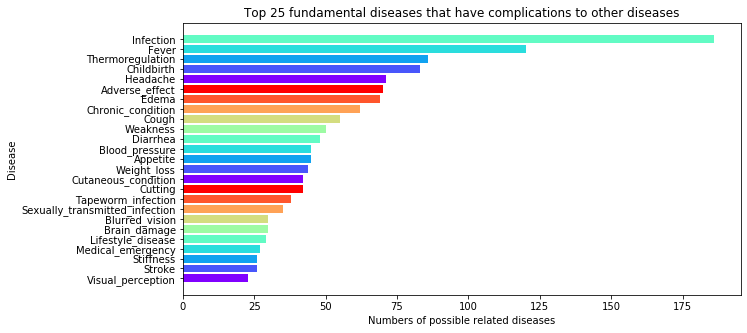

In [1142]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Top 25 fundamental diseases that have complications to other diseases')
plt.xlabel('Numbers of possible related diseases')
plt.ylabel('Disease')
plt.barh(k['D'], k['Length'], color=colors)

In [1134]:
#Symptom triple evaluation
symptomOf = URIRef(cn.causesSymptom)
physiologyOf = URIRef(cn.causesPhysiology)
physiology = URIRef('http://dbpedia.org/page/Category:Human_physiology')
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?s WHERE {{?d <"+RDF.type+"> <"+disease+"> . "
querystring = querystring+"?d <"+symptomOf+"> ?s .} UNION {?d <"+RDF.type+"> <"+disease+"> . ?d <"+physiologyOf+"> ?s .}}" 
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
print (qres)
d = {}
for row in qres:
    di = str(row.asdict()['s'].toPython()).split('/')[-1]
    cdi = str(row.asdict()['d'].toPython()).split('/')[-1]
    if not di=='Disease':
        if di not in d:
            cd = []
            cd.append(cdi)
            d[di]=cd
        else:
            x = d[di]
            x.append(cdi)
            d[di]=x
g.close()

SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> .  does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> . ?

In [1135]:
df = pd.DataFrame(d.items(), columns=['D', 'CD'])
print(len(df))
df['Length'] = df['CD'].str.len()
k=df.sort_values(by=['Length']).iloc[-25:]
k

1078


,D,CD,Length
149,Weakness,"[Shoulder-impingement-syndrome, Repetitive-str...",50
47,Injury,"[Fabricated-or-induced-illness, Shoulder-impin...",51
92,Myalgia,"[Digeorge-syndrome, Chest-infection, Compartme...",53
31,Diabetes_mellitus,"[Fabricated-or-induced-illness, Coeliac-diseas...",53
1066,Inflammation,"[Lupus, Inflammatory-bowel-disease, Crohns-dis...",54
4,Cough,"[Roseola, Chest-infection, Heartburn-and-acid-...",55
1,Itch,"[Roseola, Contact-dermatitis, Coeliac-disease,...",56
125,Bleeding,"[Sexually-transmitted-infections-stis, Gum-dis...",60
223,Chronic_condition,"[Molar-pregnancy, Kidney-disease, Cardiovascul...",62
27,Referred_pain,"[Lupus, Scurvy, Achalasia, Whiplash, Multiple-...",64


<BarContainer object of 25 artists>

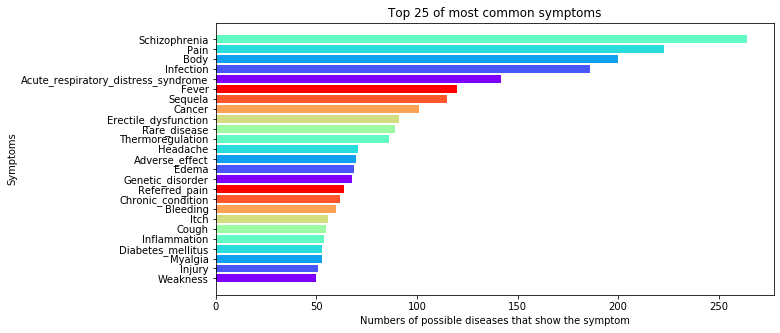

In [1136]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Top 25 of most common symptoms')
plt.xlabel('Numbers of possible diseases that show the symptom')
plt.ylabel('Symptoms')
plt.barh(k['D'], k['Length'], color=colors)

In [1022]:
#Drug or treatment triple evaluation
drugs = URIRef('http://dbpedia.org/ontology/Drug')
drug = URIRef(cn.drugTo)
treatment = URIRef(cn.treatmentTo)
treats = URIRef('http://dbpedia.org/page/Therapy')
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?s WHERE {{?d <"+RDF.type+"> <"+treats+"> ."
querystring = querystring+"?d <"+treatment+"> ?s .} UNION {?d <"+RDF.type+"> <"+drugs+"> . ?d <"+drug+"> ?s .} }" 
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
#print (qres)
d = {}
for row in qres:
    di = str(row.asdict()['d'].toPython()).split('/')[-1]
    cdi = str(row.asdict()['s'].toPython()).split('/')[-1]
    if di == 'While':
        print('')
    else:
        if di not in d:
            cd = []
            cd.append(cdi)
            d[di]=cd
        else:
            x = d[di]
            x.append(cdi)
            d[di]=x
g.close()

SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Therapy does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Therapy does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Therapy> . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Therapy> .?d < does not look 

In [1023]:
df = pd.DataFrame(d.items(), columns=['D', 'CD'])
print(len(df))
df['Length'] = df['CD'].str.len()
k=df.sort_values(by=['Length']).iloc[-25:]
k

377


,D,CD,Length
30,Bread,"[Kidney-disease, Iron-deficiency-anaemia, Eryt...",11
322,Combination_drug,"[Embolism, Bronchitis, Varicose-eczema, Cardio...",12
290,Antiviral_drug,"[Herpes-simplex-eye-infections, Erythema-multi...",12
188,Medroxyprogesterone_acetate,"[Pleurisy, Diabetic-retinopathy, Gestational-d...",13
157,Intramuscular_injection,"[Pelvic-inflammatory-disease-pid, Rhesus-disea...",14
228,General_anaesthetic,"[Oesophageal-cancer, Acoustic-neuroma, Achalas...",15
251,Pharmacotherapy,"[Erythema-multiforme, Uveitis, Social-anxiety,...",15
17,Meat_tenderness,"[Chronic-myeloid-leukaemia, Lipoedema, Vulval-...",16
226,Aspirin,"[Pre-eclampsia, Gastritis, Antiphospholipid-sy...",17
49,Evidence-based_medicine,"[Acute-lymphoblastic-leukaemia, Acne, Schistos...",17


<BarContainer object of 25 artists>

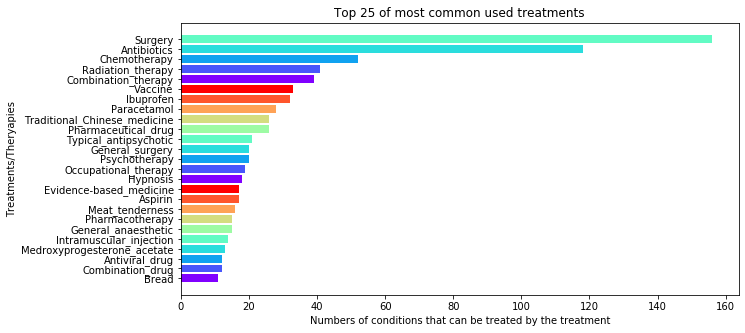

In [1024]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Top 25 of most common used treatments')
plt.xlabel('Numbers of conditions that can be treated by the treatment')
plt.ylabel('Treatments/Theryapies')
plt.barh(k['D'], k['Length'], color=colors)

In [1026]:
k.iloc[0]['CD']

['Kidney-disease',
 'Iron-deficiency-anaemia',
 'Erythema-multiforme',
 'Hypoparathyroidism',
 'Food-intolerance',
 'Lactose-intolerance',
 'Malnutrition',
 'Low-blood-sugar-hypoglycaemia',
 'Orf',
 'Obesity',
 'Coeliac-disease']

In [1143]:
#Habits evaluation
habitTo = URIRef(cn.HabitCausesTo)
habit = URIRef('http://dbpedia.org/page/Category:Habits')
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?s WHERE {?d <"+RDF.type+"> <"+habit+"> ."
querystring = querystring+"?d <"+habitTo+"> ?s .}" 
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
#print (qres)
d = {}
for row in qres:
    di = str(row.asdict()['d'].toPython()).split('/')[-1]
    cdi = str(row.asdict()['s'].toPython()).split('/')[-1]
    if di == 'Habit':
        di = 'Bad_habit'
    if di not in d:
        cd = []
        cd.append(cdi)
        d[di]=cd
    else:
        x = d[di]
        x.append(cdi)
        d[di]=x
g.close()

SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Category:Habits does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Category:Habits does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Category:Habits> . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Category:Ha

In [1144]:
df = pd.DataFrame(d.items(), columns=['D', 'CD'])
print(len(df))
df['Length'] = df['CD'].str.len()
k=df.sort_values(by=['Length']).iloc[-25:]
k

8


,D,CD,Length
2,Vice,[Albinism],1
3,Tantrum,"[Prader-willi-syndrome, Phenylketonuria]",2
1,Overeating,"[Frontotemporal-dementia, Malnutrition, Prader...",3
4,Civility,"[Vascular-dementia, Febrile-seizures, Malnutri...",4
6,Chewing_tobacco,"[Laryngeal-cancer, Mouth-cancer, Pancreatic-ca...",4
0,Bad_habit,"[Unintentional-weight-loss, Bowel-cancer, Rest...",9
5,Smoking,"[Acute-myeloid-leukaemia, Bronchitis, Embolism...",30
7,Tobacco_smoking,"[Crohns-disease, Botulism, Gallbladder-cancer,...",67


<BarContainer object of 8 artists>

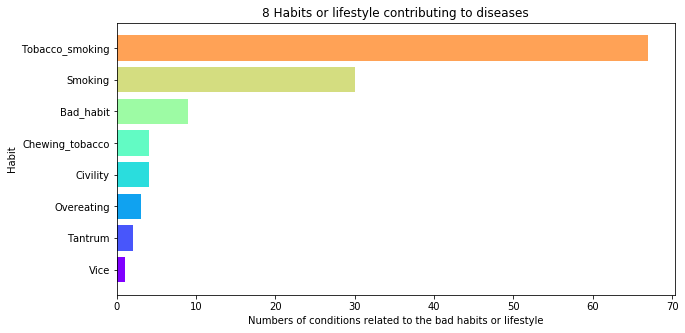

In [1145]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('8 Habits or lifestyle contributing to diseases')
plt.xlabel('Numbers of conditions related to the bad habits or lifestyle')
plt.ylabel('Habit')
plt.barh(k['D'], k['Length'], color=colors)

In [1147]:
k.iloc[3]['CD']

['Vascular-dementia',
 'Febrile-seizures',
 'Malnutrition',
 'Creutzfeldt-jakob-disease-cjd']

In [1034]:
#Season evaluation
seasonOf = URIRef(cn.seasonAffectTo)
season = URIRef('http://dbpedia.org/page/Season')
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?s WHERE {?d <"+RDF.type+"> <"+season+"> ."
querystring = querystring+"?d <"+seasonOf+"> ?s .}" 
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
#print (qres)
d = {}
for row in qres:
    di = str(row.asdict()['d'].toPython()).split('/')[-1]
    cdi = str(row.asdict()['s'].toPython()).split('/')[-1]
    if di not in d:
        cd = []
        cd.append(cdi)
        d[di]=cd
    else:
        x = d[di]
        x.append(cdi)
        d[di]=x
g.close()

SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Season does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Season does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Season> . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Season> .?d < does not look like a val

In [1035]:
df = pd.DataFrame(d.items(), columns=['D', 'CD'])
print(len(df))
df['Length'] = df['CD'].str.len()
k=df.sort_values(by=['Length']).iloc[-25:]
k

4


,D,CD,Length
0,Spring,[Polymorphic-light-eruption],1
1,Summer,"[Melanoma-skin-cancer, Pityriasis-versicolor]",2
3,Winter,"[Polymorphic-light-eruption, Bronchiolitis, Hy...",7
2,Autumn,"[Addisons-disease, Monkeypox, Bowens-disease, ...",10


<BarContainer object of 4 artists>

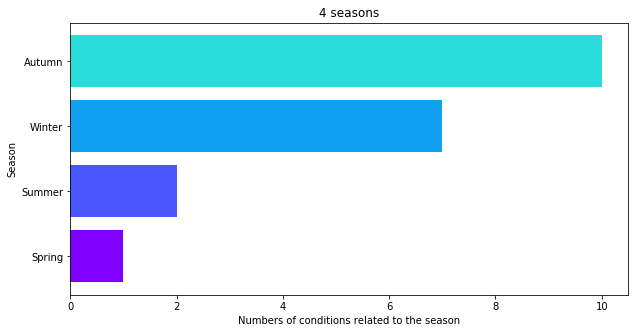

In [1037]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('4 seasons')
plt.xlabel('Numbers of conditions related to the season')
plt.ylabel('Season')
plt.barh(k['D'], k['Length'], color=colors)

In [1047]:
#Human group evaluation
agegroup = URIRef(cn.causesAffectionToAgeGroup)
ages = URIRef('http://dbpedia.org/page/Category:Human_development')
sex = URIRef('http://dbpedia.org/page/Category:Sex')
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?s WHERE {{?d <"+RDF.type+"> <"+ages+"> . "
querystring = querystring+"?s <"+agegroup+"> ?d .} UNION {?d <"+RDF.type+"> <"+sex+"> . ?s <"+agegroup+"> ?d .} }"
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
print (len(qres))
d = {}
for row in qres:
    di = str(row.asdict()['d'].toPython()).split('/')[-1]
    cdi = str(row.asdict()['s'].toPython()).split('/')[-1]
    if di == 'Childhood':
        di = 'Child'
    if di == 'Male':
        di = 'Man'
    if di not in d:
        cd = []
        cd.append(cdi)
        d[di]=cd
    else:
        x = d[di]
        x.append(cdi)
        d[di]=x
g.close()

SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Category:Human_development does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Category:Human_development does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/page/Category:Human_development> .  does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {{?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#ty

844


In [1048]:
df = pd.DataFrame(d.items(), columns=['D', 'CD'])
print(len(df))
df['Length'] = df['CD'].str.len()
k=df.sort_values(by=['Length']).iloc[-10:]
k

66


,D,CD,Length
8,Higher_education,"[Gallbladder-cancer, Food-allergy, Swine-flu, ...",23
33,Unwell,"[Dengue, Anxiety-disorders-in-children, Food-p...",27
30,Mother,"[Hiv-and-aids, Sepsis, Neuroendocrine-tumours,...",27
10,Adolescence,"[Meningitis, Mumps, Social-anxiety, Pityriasis...",28
64,Woman,"[Vulval-cancer, Urinary-tract-infections-utis,...",33
42,Infant,"[Cystic-fibrosis, Neonatal-herpes, Maple-syrup...",66
63,Man,"[Undescended-testicles, Antiphospholipid-syndr...",67
31,Adult,"[Hydronephrosis, Hodgkin-lymphoma, Granuloma-a...",94
47,Ageing,"[Brain-tumours, Anxiety-disorders-in-children,...",105
21,Child,"[Gender-dysphoria, Hereditary-spastic-parapleg...",122


<BarContainer object of 10 artists>

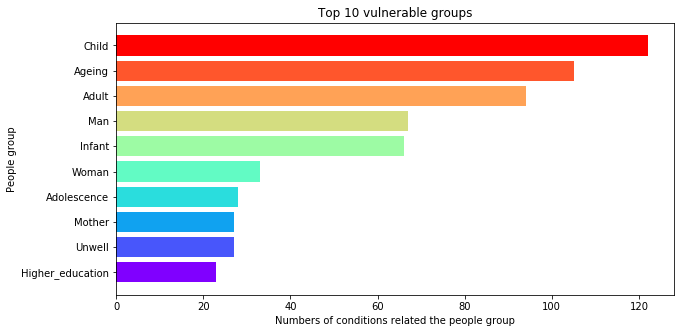

In [1049]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Top 10 vulnerable groups')
plt.xlabel('Numbers of conditions related the people group')
plt.ylabel('People group')
plt.barh(k['D'], k['Length'], color=colors)

In [1041]:
k.iloc[0]['CD']

['Pelvic-inflammatory-disease-pid',
 'Metabolic-syndrome',
 'Mumps',
 'Acromegaly',
 'Transient-ischaemic-attack-tia',
 'Pre-eclampsia',
 'Ovarian-cyst',
 'Polycystic-ovary-syndrome-pcos',
 'Edwards-syndrome',
 'Botulism',
 'Food-allergy',
 'Klinefelters-syndrome',
 'Dehydration',
 'Coeliac-disease',
 'Womb-cancer',
 'Endocarditis',
 'Chronic-lymphocytic-leukaemia',
 'Hepatitis-c',
 'Spina-bifida',
 'Embolism',
 'Swine-flu',
 'Air-embolism',
 'Gallbladder-cancer']

In [1042]:
#species analysis
speciesTo = URIRef(cn.SpeciesCausesTo)
species = URIRef('http://dbpedia.org/ontology/Species')
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?s WHERE {?d <"+RDF.type+"> <"+species+"> ."
querystring = querystring+"?d <"+speciesTo+"> ?s .}" 
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
#print (qres)
d = {}
for row in qres:
    di = str(row.asdict()['d'].toPython()).split('/')[-1]
    cdi = str(row.asdict()['s'].toPython()).split('/')[-1]
    if di not in d:
        cd = []
        cd.append(cdi)
        d[di]=cd
    else:
        x = d[di]
        x.append(cdi)
        d[di]=x
g.close()

SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Species does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Species does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Species> . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Species> .?d < does

In [1044]:
df = pd.DataFrame(d.items(), columns=['D', 'CD'])
print(len(df))
df['Length'] = df['CD'].str.len()
k=df.sort_values(by=['Length']).iloc[-25:]
k

113


,D,CD,Length
104,Mite,"[Typhus, Allergies, Allergic-rhinitis, Asthma]",4
111,Helicobacter,"[Stomach-ulcer, Stomach-cancer, Pancreatic-can...",4
89,Oat,"[Irritable-bowel-syndrome-ibs, Constipation, H...",4
109,Pharmacis,"[Spina-bifida, Iron-deficiency-anaemia, Pityri...",4
42,Spotted_hyena,"[Abdominal-aortic-aneurysm, Mitral-valve-probl...",4
96,Broccoli,"[Hypoparathyroidism, Spina-bifida, Lactose-int...",4
81,Wheat,"[Food-intolerance, Food-allergy, Constipation,...",4
17,Probiotic,"[Rett-syndrome, Claustrophobia, Prostate-cance...",5
24,Asian_black_bear,"[Eye-cancer, Acute-lymphoblastic-leukaemia, Di...",5
86,Common_tern,"[Phantosmia, Ovarian-cancer, Peripheral-neurop...",5


<BarContainer object of 25 artists>

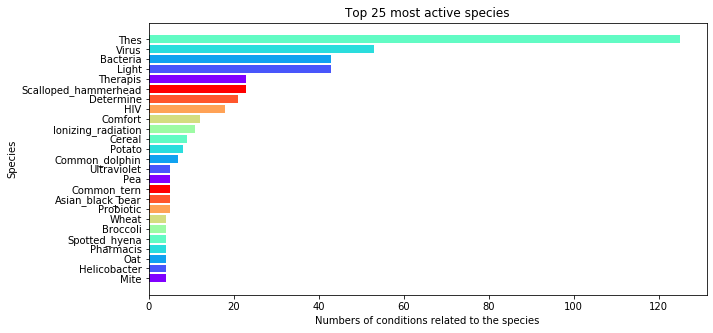

In [1046]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Top 25 most active species')
plt.xlabel('Numbers of conditions related to the species')
plt.ylabel('Species')
plt.barh(k['D'], k['Length'], color=colors)

In [1050]:
#Checking the numbers of triples generated in the KG
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT ?d ?p ?s WHERE {?d ?p ?s}"
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
print (len(qres))
g.close()

21140


In [1097]:
#2-length chain counting
causes = URIRef(cn.causesDisease)
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <"+RDF.type+"> <"+disease+"> . "
querystring = querystring+"?d <"+causes+"> ?d1 . ?d1 ?p ?d2}" 
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
print (len(qres))
dchain = []
for row in qres:
    d = str(row.asdict()['d'].toPython()).split('/')[-1]
    d1 = str(row.asdict()['d1'].toPython()).split('/')[-1]
    d2 = str(row.asdict()['d2'].toPython()).split('/')[-1]
    if not (d == d1 or d == d2 or d1==d2):
        dchain.append(d+'->'+d1+'->'+d2)
g.close()

SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> .  does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.o

115531


In [1098]:
len(dchain)

111186

In [1106]:
dchain[7000]

'Cutaneous_condition->Scleroderma->Blood_vessel'

In [1107]:
#3-length chain counting
causes = URIRef(cn.causesDisease)
sameAs = URIRef(owl.sameAs)
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <"+RDF.type+"> <"+disease+"> . "
querystring = querystring+"?d <"+causes+"> ?d1 . ?d1 <"+sameAs+"> ?dpd . ?dpd <"+causes+"> ?d2}" 
#querystring = querystring+"?s <"+RDF.type+"> <"+symp+"> . }" 
#print(querystring)
qres = g.query(querystring)
dpchain = []
for row in qres:
    d = str(row.asdict()['d'].toPython()).split('/')[-1]
    d1 = str(row.asdict()['d1'].toPython()).split('/')[-1]
    d2 = str(row.asdict()['d2'].toPython()).split('/')[-1]
    if not (d == d1 or d == d2 or d1==d2):
        dpchain.append(d+'->'+d1+'->'+d2)
print (len(dpchain))
g.close()

SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> .  does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.o

758


In [1108]:
dpchain[:6]

['Lineal_descendant->Testicular-cancer->Undescended-testicles',
 'Chronic_traumatic_encephalopathy->Chronic-traumatic-encephalopathy->Concussion',
 'Hidradenitis_suppurativa->Hidradenitis-suppurativa->Anal-fistula',
 'Medical_emergency->Stroke->Transient-ischaemic-attack-tia',
 'Medical_emergency->Stroke->Air-embolism',
 'Medical_emergency->Stroke->Cavernoma']

In [1114]:
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?d1 ?d2 ?d3 WHERE {?d <"+RDF.type+"> <"+disease+"> . "
querystring = querystring+"?d <"+causes+"> ?d1 . ?d1 <"+sameAs+"> ?dpd . ?dpd <"+causes+"> ?d2 ." 
querystring = querystring+"?d2 <"+sameAs+"> ?dpd1 . ?dpd1 <"+causes+"> ?d3 .}" 
qres = g.query(querystring)
dpchain4 = []
#print(len(qres))
for row in qres:
    kw = []
    d = str(row.asdict()['d'].toPython()).split('/')[-1]
    kw.append(d)
    d1 = str(row.asdict()['d1'].toPython()).split('/')[-1]
    if d1 not in kw:
        kw.append(d1)
        d2 = str(row.asdict()['d2'].toPython()).split('/')[-1]
        if d2 not in kw:
            kw.append(d2)
            d3 = str(row.asdict()['d3'].toPython()).split('/')[-1]
            if d3 not in kw:
                dpchain4.append(d+'->'+d1+'->'+d2+'->'+d3)
print (len(dpchain4))
g.close()

SELECT DISTINCT ?d ?d1 ?d2 ?d3 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> .  does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns

149


In [1115]:
print (len(dpchain4))

149


In [1116]:
dpchain4[:10]

['Stiffness->Rheumatoid-arthritis->Septic-arthritis->Hib',
 'Stiffness->Rheumatoid-arthritis->Psoriasis->Pagets-disease-nipple',
 'Stiffness->Rheumatoid-arthritis->Psoriasis->Arthritis',
 'Stiffness->Rheumatoid-arthritis->Psoriasis->Psoriatic-arthritis',
 'Stiffness->Rheumatoid-arthritis->Psoriasis->Bowens-disease',
 'Stiffness->Rheumatoid-arthritis->Psoriatic-arthritis->Psoriasis',
 'Stiffness->Rheumatoid-arthritis->Psoriatic-arthritis->Myositis',
 'Stiffness->Rheumatoid-arthritis->Trigger-finger->Repetitive-strain-injury-rsi',
 'Edema->Rheumatoid-arthritis->Septic-arthritis->Hib',
 'Edema->Rheumatoid-arthritis->Psoriasis->Pagets-disease-nipple']

In [1126]:
symptomOf = URIRef(cn.causesSymptom)
g = Graph()
result = g.parse('cknns/nhskg', format='turtle')
querystring = "SELECT DISTINCT ?d ?d1 ?d2 ?d3 ?s WHERE {?d <"+RDF.type+"> <"+disease+"> . "
querystring = querystring+"?d <"+causes+"> ?d1 . ?d1 <"+sameAs+"> ?dpd . ?dpd <"+causes+"> ?d2 ." 
querystring = querystring+"?d2 <"+sameAs+"> ?dpd1 . ?dpd1 <"+causes+"> ?d3 . ?d3 <"+symptomOf+"> ?s}" 
qres = g.query(querystring)
dpchain3t = []
dpchain4t = []
dpchain4s = []
for row in qres:
    kw = []
    d = str(row.asdict()['d'].toPython()).split('/')[-1]
    kw.append(d)
    d1 = str(row.asdict()['d1'].toPython()).split('/')[-1]
    if d1 not in kw:
        kw.append(d1)
        d2 = str(row.asdict()['d2'].toPython()).split('/')[-1]
        if d2 not in kw:
            kw.append(d2)
            dpchain3t.append(d+'->'+d1+'->'+d2)
            d3 = str(row.asdict()['d3'].toPython()).split('/')[-1]
            if d3 not in kw:
                kw.append(d3)
                dpchain4t.append(d+'->'+d1+'->'+d2+'->'+d3)
                s = str(row.asdict()['s'].toPython()).split('/')[-1]
                if s not in kw:
                    dpchain4s.append(d+'->'+d1+'->'+d2+'->'+d3+'->'+s)
print (len(dpchain4s))
g.close()

SELECT DISTINCT ?d ?d1 ?d2 ?d3 ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> < does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> .  does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?d ?d1 ?d2 ?d3 ?s WHERE {?d <http://www.w3.org/1999/0

SELECT DISTINCT ?d ?d1 ?d2 ?d3 ?s WHERE {?d <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Disease> . ?d <http://nhscausalknowledgegraph.org/condtion/causesDisease> ?d1 . ?d1 <http://www.w3.org/2002/07/owl#sameAs> ?dpd . ?dpd <http://nhscausalknowledgegraph.org/condtion/causesDisease> ?d2 .?d2 <http://www.w3.org/2002/07/owl#sameAs> ?dpd1 . ?dpd1 <http://nhscausalknowledgegraph.org/condtion/causesDisease> ?d3 . ?d3 <http://nhscausalknowledgegraph.org/condtion/causesSymptom> ?s} does not look like a valid URI, trying to serialize this will break.


3683


In [1127]:
print (len(dpchain3t))
print (len(dpchain4t))
print (len(dpchain4s))

6307
3847
3683


In [1149]:
dpchain4s[3000]

'Weight_loss->Rheumatoid-arthritis->Psoriasis->Pagets-disease-nipple->Breast_cancer'

In [1163]:
word_book=[]

In [1168]:
allNHSDis = []
for f in onlyfiles:
    if not f =='nhskg.tll':
        allNHSDis.append(f)

In [1199]:
def clustering_preprocesing_st1(tp):
    evaluation_data=[]
    sdg = Graph()
    causes = URIRef(cn.causesDisease)
    anatomicOn = URIRef(cn.causeOnAnatomicStructure)
    drug = URIRef(cn.drugTo)
    diag = URIRef(cn.diagnosisTo)
    symptomOf = URIRef(cn.causesSymptom)
    treatment = URIRef(cn.treatmentTo)
    question=  URIRef(cn.question)
    answer = URIRef(cn.answerTo)
    anabout = URIRef(cn.aLabel)
    disease = URIRef('http://dbpedia.org/ontology/Disease')
    wikidisease = URIRef('https://www.wikidata.org/wiki/Q12136')
    anat = URIRef('http://dbpedia.org/ontology/AnatomicalStructure')
    wikianat = URIRef('https://www.wikidata.org/wiki/Q4936952')
    symp = URIRef('http://dbpedia.org/resource/Category:Symptoms_and_signs')
    presign = URIRef('http://purl.org/dc/terms/subject')
    drugs = URIRef('http://dbpedia.org/ontology/Drug')
    condition = URIRef('http://umbel.org/umbel/rc/AilmentCondition')
    diseaseProperty = URIRef('http://dbpedia.org/property/diseasesdb')
    diags = URIRef('http://dbpedia.org/page/Medical_diagnosis')
    treats = URIRef('http://dbpedia.org/page/Therapy')
    ages = URIRef('http://dbpedia.org/page/Category:Human_development')
    sdg = Graph()
    filepath='cknns/'+tp
    if path.exists(filepath):
        print('ok')
        sdg.parse(filepath, format="ttl")
        querystring = "SELECT DISTINCT ?t ?p WHERE {"
        querystring = querystring + "?t <"+RDF.type+"> ?p ." 
        querystring = querystring+"}"
        #print (querystring)
        qres = sdg.query(querystring)
        sympstring=[]
        drugstring=[]
        tretstring=[]
        diagstring=[]
        onbostring=[]
        disestring=[]
        agegstring=[]
        if (len(qres)!=0):
            #print (qres)
            topistring=tp.replace('-',' ')+' is a human disease.'
            for row in qres:
                p = str(row.asdict()['p'].toPython())
                t = str(row.asdict()['t'].toPython()).split('/')[-1].replace('_',' ')
                #print(t,tp.replace('-',' '))
                if t!= '':
                    if p!='' and p=='http://dbpedia.org/ontology/Disease' and t.lower()!=tp.replace('-',' '):
                        if t.lower()!='disease':
                            disestring.append(t.lower())
                            if not t.lower() in word_book:
                                word_book.append(t.lower())
                    elif p!='' and p=='http://dbpedia.org/resource/Category:Symptoms_and_signs' and t.lower()!=tp.replace('-',' '):
                        if t.lower()!='disease':
                            sympstring.append(t.lower())
                            if not t.lower() in word_book:
                                word_book.append(t.lower())
                    elif p!='' and p=='http://dbpedia.org/ontology/Drug' and len(t)>2:
                        drugstring.append(t.lower())
                        if not t.lower() in word_book:
                                word_book.append(t.lower())
                    elif p!='' and p=='http://dbpedia.org/page/Therapy':
                        tretstring.append(t.lower())
                        if not t.lower() in word_book:
                                word_book.append(t.lower())
                    elif p!='' and p=='http://dbpedia.org/page/Medical_diagnosis':
                        diagstring.append(t.lower())
                        if not t.lower() in word_book:
                                word_book.append(t.lower())
                    elif p!='' and p=='http://dbpedia.org/ontology/AnatomicalStructure':
                        onbostring.append(t.lower())
                        if not t.lower() in word_book:
                                word_book.append(t.lower())
                    elif p!='' and (p=='http://dbpedia.org/page/Category:Human_development' or p=='http://dbpedia.org/page/Category:Sex'):
                        if t.lower()!='people':
                            agegstring.append(t.lower())
                            if not t.lower() in word_book:
                                word_book.append(t.lower())
            evaluation_data.append([{'Related_disease':disestring,'Symptoms':sympstring,'Drugs':drugstring,'Treatments':tretstring,'Diagnosis_methods':diagstring,'anatomical_structure':onbostring,'age_group/gender':agegstring}])
    return evaluation_data

In [1214]:
global_e = []
i=0
for dis in allNHSDis:
    #dis_name = dis.split('.')[0]
    #if i<3:
    print (i,dis)
    e = clustering_preprocesing_st1(dis)
    global_e.append(e)
    i=i+1

SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.


0 Abdominal-aortic-aneurysm.ttl
ok
1 Abscess.ttl
ok
2 Achalasia.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

3 Acne.ttl
ok
4 Acoustic-neuroma.ttl
ok
5 Acromegaly.ttl
ok
6 Acute-cholecystitis.ttl
ok
7 Acute-kidney-injury.ttl
ok
8 Acute-lymphoblastic-leukaemia.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

9 Acute-myeloid-leukaemia.ttl
ok
10 Acute-pancreatitis.ttl
ok
11 Acute-respiratory-distress-syndrome.ttl
ok
12 Addisons-disease.ttl
ok
13 Adenoids-and-adenoidectomy.ttl
ok
14 Agoraphobia.ttl
ok
15 Air-embolism.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

16 Albinism.ttl
ok
17 Alcohol-related-liver-disease-arld.ttl
ok
18 Allergic-rhinitis.ttl
ok
19 Allergies.ttl
ok
20 Alzheimers-disease.ttl
ok
21 Amyloidosis.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

22 Anal-cancer.ttl
ok
23 Anal-fistula.ttl
ok
24 Androgen-insensitivity-syndrome.ttl
ok
25 Angina.ttl
ok
26 Angioedema.ttl
ok
27 Ankylosing-spondylitis.ttl
ok
28 Anorexia.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

29 Antiphospholipid-syndrome.ttl
ok
30 Anxiety-disorders-in-children.ttl
ok
31 Arthritis.ttl
ok
32 Asbestosis.ttl
ok
33 Asthma.ttl
ok
34 Astigmatism.ttl
ok
35 Atherosclerosis.ttl
ok
36 Attention-deficit-hyperactivity-disorder-adhd.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

37 Autosomal-dominant-polycystic-kidney-disease-adpkd.ttl
ok
38 Autosomal-recessive-polycystic-kidney-disease-arpkd.ttl
ok
39 Bartholins-cyst.ttl
ok
40 Benign-brain-tumour.ttl
ok
41 Bile-duct-cancer.ttl
ok
42 Bipolar-disorder.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

43 Bird-flu.ttl
ok
44 Bladder-stones.ttl
ok
45 Bone-cancer.ttl
ok
46 Bornholm-disease.ttl
ok
47 Botulism.ttl
ok
48 Bowel-cancer.ttl
ok
49 Bowel-incontinence.ttl


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

ok
50 Bowel-polyps.ttl
ok
51 Bowens-disease.ttl
ok
52 Brain-abscess.ttl
ok
53 Brain-aneurysm.ttl
ok
54 Brain-tumours.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

55 Breast-cancer-in-men.ttl
ok
56 Breast-cancer.ttl
ok
57 Bronchiolitis.ttl
ok
58 Bronchitis.ttl
ok
59 Brucellosis.ttl
ok
60 Brugada-syndrome.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

61 Bulimia.ttl
ok
62 C-difficile.ttl
ok
63 Cardiovascular-disease.ttl
ok
64 Cavernoma.ttl
ok
65 Cerebral-palsy.ttl
ok
66 Cervical-cancer.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

67 Charcot-marie-tooth-disease.ttl
ok
68 Charles-bonnet-syndrome.ttl
ok
69 Chest-infection.ttl
ok
70 Chiari-malformation.ttl
ok
71 Chickenpox.ttl
ok
72 Chlamydia.ttl
ok
73 Cholesteatoma.ttl
ok
74 Chronic-lymphocytic-leukaemia.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

75 Chronic-myeloid-leukaemia.ttl
ok
76 Chronic-obstructive-pulmonary-disease-copd.ttl
ok
77 Chronic-pancreatitis.ttl
ok
78 Chronic-traumatic-encephalopathy.ttl
ok
79 Cirrhosis.ttl
ok
80 Claustrophobia.ttl
ok
81 Clinical-depression.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

82 Coeliac-disease.ttl
ok
83 Coma.ttl
ok
84 Common-cold.ttl
ok
85 Compartment-syndrome.ttl
ok
86 Complex-regional-pain-syndrome.ttl
ok
87 Concussion.ttl
ok
88 Congenital-heart-disease.ttl
ok
89 Constipation.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

90 Contact-dermatitis.ttl
ok
91 Coronary-heart-disease.ttl
ok
92 Corticobasal-degeneration.ttl
ok
93 Costochondritis.ttl
ok
94 Creutzfeldt-jakob-disease-cjd.ttl
ok
95 Crohns-disease.ttl
ok
96 Cushings-syndrome.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

97 Cyclospora.ttl
ok
98 Cyclothymia.ttl
ok
99 Cystic-fibrosis.ttl
ok
100 Cytomegalovirus-cmv.ttl
ok
101 Dehydration.ttl
ok
102 Dengue.ttl
ok
103 Detached-retina-retinal-detachment.ttl
ok
104 Diabetes-insipidus.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

105 Diabetes.ttl
ok
106 Diabetic-ketoacidosis.ttl
ok
107 Diabetic-retinopathy.ttl
ok
108 Digeorge-syndrome.ttl
ok
109 Diphtheria.ttl
ok
110 Diverticular-disease-and-diverticulitis.ttl
ok
111 Dysentery.ttl
ok
112 Ear-infections.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

113 Early-menopause.ttl
ok
114 Ebola.ttl
ok
115 Edwards-syndrome.ttl
ok
116 Embolism.ttl
ok
117 Encephalitis.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

118 Endocarditis.ttl
ok
119 Endometriosis.ttl
ok
120 Epidermolysis-bullosa.ttl
ok
121 Epiglottitis.ttl
ok
122 Epilepsy.ttl
ok
123 Erythema-multiforme.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

124 Ewing-sarcoma.ttl
ok
125 Eye-cancer.ttl
ok
126 Fabricated-or-induced-illness.ttl
ok
127 Febrile-seizures.ttl
ok
128 Fibromyalgia.ttl
ok
129 Flu.ttl
ok
130 Food-allergy.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

131 Food-intolerance.ttl
ok
132 Food-poisoning.ttl
ok
133 Frontotemporal-dementia.ttl
ok
134 Frostbite.ttl
ok
135 Gallbladder-cancer.ttl
ok
136 Gallstones.ttl
ok
137 Gangrene.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

138 Gastritis.ttl
ok
139 Gender-dysphoria.ttl
ok
140 Generalised-anxiety-disorder.ttl
ok
141 Gestational-diabetes.ttl
ok
142 Giardiasis.ttl
ok
143 Glaucoma.ttl
ok
144 Glomerulonephritis.ttl
ok
145 Goitre.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

146 Gonorrhoea.ttl
ok
147 Granuloma-annulare.ttl
ok
148 Granulomatosis-with-polyangiitis.ttl
ok
149 Gum-disease.ttl
ok
150 Haemochromatosis.ttl
ok
151 Haemophilia.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

152 Hand-foot-mouth-disease.ttl
ok
153 Heart-attack.ttl
ok
154 Heart-failure.ttl
ok
155 Heart-palpitations.ttl
ok
156 Heartburn-and-acid-reflux.ttl
ok
157 Henoch-schonlein-purpura-hsp.ttl
ok
158 Hepatitis-a.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

159 Hepatitis-b.ttl
ok
160 Hepatitis-c.ttl
ok
161 Hepatitis.ttl
ok
162 Hereditary-haemorrahagic-telangiectasia.ttl
ok
163 Hereditary-neuropathy.ttl
ok
164 Hereditary-spastic-paraplegia.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

165 Herpes-simplex-eye-infections.ttl
ok
166 Hib.ttl
ok
167 Hidradenitis-suppurativa.ttl
ok
168 High-blood-sugar-hyperglycaemia.ttl
ok
169 Hip-pain-children-irritable-hip.ttl
ok
170 Hirschsprungs-disease.ttl
ok
171 Hiv-and-aids.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

172 Hodgkin-lymphoma.ttl
ok
173 Homocystinuria.ttl
ok
174 Huntingtons-disease.ttl
ok
175 Hydrocephalus.ttl
ok
176 Hydronephrosis.ttl
ok
177 Hyperparathyroidism.ttl
ok
178 Hypoparathyroidism.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

179 Hypothermia.ttl
ok
180 Idiopathic-pulmonary-fibrosis.ttl
ok
181 Indigestion.ttl
ok
182 Inflammatory-bowel-disease.ttl
ok
183 Insect-bites-and-stings.ttl
ok
184 Insomnia.ttl
ok
185 Interstitial-cystitis.ttl
ok
186 Intracranial-hypertension.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

187 Iron-deficiency-anaemia.ttl
ok
188 Irregular-periods.ttl
ok
189 Irritable-bowel-syndrome-ibs.ttl
ok
190 Isovaleric-acidaemia.ttl
ok
191 Japanese-encephalitis.ttl
ok
192 Jaundice-newborn.ttl
ok
193 Jellyfish-and-other-sea-creature-stings.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

194 Jet-lag.ttl
ok
195 Joint-hypermobility-syndrome.ttl
ok
196 Kaposis-sarcoma.ttl
ok
197 Kidney-cancer.ttl
ok
198 Kidney-disease.ttl
ok
199 Kidney-infection.ttl
ok
200 Kidney-stones.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

201 Klinefelters-syndrome.ttl
ok
202 Kwashiorkor.ttl
ok
203 Kyphosis.ttl
ok
204 Labyrinthitis.ttl
ok
205 Lactose-intolerance.ttl
ok
206 Laryngeal-cancer.ttl
ok
207 Lazy-eye.ttl


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

ok
208 Legionnaires-disease.ttl
ok
209 Lipoedema.ttl
ok
210 Liver-cancer.ttl
ok
211 Low-blood-pressure-hypotension.ttl
ok
212 Low-blood-sugar-hypoglycaemia.ttl
ok
213 Lung-cancer.ttl
ok
214 Lupus.ttl
ok
215 Lyme-disease.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

216 Lymphoedema.ttl
ok
217 Malaria.ttl
ok
218 Male-menopause.ttl
ok
219 Malignant-brain-tumour.ttl
ok
220 Malnutrition.ttl
ok
221 Maple-syrup-urine-disease.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

222 Marfan-syndrome.ttl
ok
223 Melanoma-skin-cancer.ttl
ok
224 Meningitis.ttl
ok
225 Mesothelioma.ttl
ok
226 Metabolic-syndrome.ttl
ok
227 Middle-east-respiratory-syndrome-mers.ttl
ok
228 Migraine.ttl
ok
229 Miscarriage.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

230 Mitral-valve-problems.ttl
ok
231 Molar-pregnancy.ttl
ok
232 Molluscum-contagiosum.ttl
ok
233 Monkeypox.ttl
ok
234 Motor-neurone-disease.ttl
ok
235 Mouth-cancer.ttl
ok
236 Multiple-myeloma.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

237 Multiple-sclerosis.ttl
ok
238 Multiple-system-atrophy.ttl
ok
239 Mumps.ttl
ok
240 Mycobacterium-chimaera.ttl
ok
241 Myositis.ttl
ok
242 Narcolepsy.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

243 Nasal-and-sinus-cancer.ttl
ok
244 Necrotising-fasciitis.ttl
ok
245 Neonatal-herpes.ttl
ok
246 Nephrotic-syndrome.ttl
ok
247 Neuroblastoma.ttl
ok
248 Neuroendocrine-tumours.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

249 Neurofibromatosis-type-1.ttl
ok
250 Neurofibromatosis-type-2.ttl
ok
251 Neuromyelitis-optica.ttl
ok
252 Non-alcoholic-fatty-liver-disease.ttl
ok
253 Non-allergic-rhinitis.ttl
ok
254 Non-gonococcal-urethritis.ttl
ok
255 Non-hodgkin-lymphoma.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

256 Non-melanoma-skin-cancer.ttl
ok
257 Noonan-syndrome.ttl
ok
258 Obesity.ttl
ok
259 Obsessive-compulsive-disorder-ocd.ttl
ok
260 Oesophageal-atresia.ttl
ok
261 Oesophageal-cancer.ttl
ok
262 Orf.ttl
ok
263 Osteoarthritis.ttl


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

ok
264 Osteomyelitis.ttl
ok
265 Osteophyte.ttl
ok
266 Osteoporosis.ttl
ok
267 Otosclerosis.ttl
ok
268 Ovarian-cancer.ttl
ok
269 Ovarian-cyst.ttl
ok
270 Overactive-thyroid-hyperthyroidism.ttl
ok
271 Pagets-disease-bone.ttl


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

ok
272 Pagets-disease-nipple.ttl
ok
273 Pancreatic-cancer.ttl
ok
274 Parkinsons-disease.ttl
ok
275 Pataus-syndrome.ttl
ok
276 Pelvic-inflammatory-disease-pid.ttl
ok
277 Pelvic-organ-prolapse.ttl


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

ok
278 Pemphigus-vulgaris.ttl
ok
279 Perforated-eardrum.ttl
ok
280 Period-pain.ttl
ok
281 Peripheral-neuropathy.ttl
ok
282 Persistent-trophoblastic-disease-choriocarcinoma.ttl
ok
283 Personality-disorder.ttl
ok
284 Phantosmia.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

285 Phenylketonuria.ttl
ok
286 Phimosis.ttl
ok
287 Phobias.ttl
ok
288 Pityriasis-rosea.ttl
ok
289 Pityriasis-versicolor.ttl
ok
290 Pleurisy.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

291 Pneumonia.ttl
ok
292 Poisoning.ttl
ok
293 Polio.ttl
ok
294 Polycystic-ovary-syndrome-pcos.ttl
ok
295 Polycythaemia.ttl
ok
296 Polymorphic-light-eruption.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

297 Polymyalgia-rheumatica.ttl
ok
298 Post-herpetic-neuralgia.ttl
ok
299 Post-polio-syndrome.ttl
ok
300 Prader-willi-syndrome.ttl
ok
301 Pre-eclampsia.ttl
ok
302 Pre-menstrual-syndrome.ttl
ok
303 Pressure-sores.ttl
ok
304 Primary-biliary-cirrhosis-pbc.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

305 Progressive-supranuclear-palsy-psp.ttl
ok
306 Prostate-cancer.ttl
ok
307 Prostate-enlargement.ttl
ok
308 Prostatitis.ttl
ok
309 Psoriasis.ttl
ok
310 Psoriatic-arthritis.ttl
ok
311 Psychosis.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

312 Q-fever.ttl
ok
313 Reactive-arthritis.ttl
ok
314 Reflux-in-babies.ttl
ok
315 Repetitive-strain-injury-rsi.ttl
ok
316 Respiratory-tract-infection.ttl
ok
317 Restless-legs-syndrome.ttl
ok
318 Retinoblastoma.ttl
ok
319 Rett-syndrome.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

320 Rhesus-disease.ttl
ok
321 Rheumatoid-arthritis.ttl
ok
322 Rickets-and-osteomalacia.ttl
ok
323 Ringworm.ttl
ok
324 Roseola.ttl
ok
325 Rubella.ttl
ok
326 Sars.ttl
ok
327 Schistosomiasis.ttl


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

ok
328 Schizophrenia.ttl
ok
329 Scleroderma.ttl
ok
330 Scurvy.ttl
ok
331 Seasonal-affective-disorder-sad.ttl
ok
332 Sepsis.ttl
ok
333 Septic-arthritis.ttl
ok
334 Sexually-transmitted-infections-stis.ttl


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

ok
335 Shingles.ttl
ok
336 Short-sightedness.ttl
ok
337 Shoulder-impingement-syndrome.ttl
ok
338 Sick-building-syndrome.ttl
ok
339 Sickle-cell-disease.ttl
ok
340 Slapped-cheek-syndrome.ttl
ok
341 Sleep-apnoea.ttl
ok
342 Sleep-paralysis.ttl
ok
343 Social-anxiety.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

344 Spina-bifida.ttl
ok
345 Spinal-muscular-atrophy-sma.ttl
ok
346 Stevens-johnson-syndrome.ttl
ok
347 Stomach-cancer.ttl
ok
348 Stomach-ulcer.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

349 Stroke.ttl
ok
350 Subarachnoid-haemorrhage.ttl
ok
351 Subdural-haematoma.ttl
ok
352 Supraventricular-tachycardia-svt.ttl
ok
353 Swine-flu.ttl
ok
354 Syphilis.ttl
ok
355 Testicular-cancer.ttl
ok
356 Thalassaemia.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

357 Thrush-in-men-and-women.ttl
ok
358 Tonsillitis.ttl
ok
359 Transient-ischaemic-attack-tia.ttl
ok
360 Trichomoniasis.ttl
ok
361 Trigger-finger.ttl
ok
362 Tuberculosis-tb.ttl
ok
363 Turner-syndrome.ttl
ok
364 Type-2-diabetes.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

365 Typhoid-fever.ttl
ok
366 Typhus.ttl
ok
367 Ulcerative-colitis.ttl
ok
368 Underactive-thyroid-hypothyroidism.ttl
ok
369 Undescended-testicles.ttl
ok
370 Unintentional-weight-loss.ttl
ok
371 Urinary-incontinence.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

372 Urinary-tract-infections-utis.ttl
ok
373 Uveitis.ttl
ok
374 Vaginal-cancer.ttl
ok
375 Vaginitis.ttl
ok
376 Varicose-eczema.ttl
ok
377 Vascular-dementia.ttl
ok
378 Von-willebrand-disease.ttl
ok
379 Vulval-cancer.ttl
ok


SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p . does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?p .} does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-ns#type does not look like a valid URI, trying to serialize this will break.
SELECT DISTINCT ?t ?p WHERE {?t <http://www.w3.org/1999/02/22-rdf-syntax-n

380 Whiplash.ttl
ok
381 Womb-cancer.ttl
ok
382 Yellow-fever.ttl
ok


In [1215]:
len(global_e)

383

In [1218]:
len(word_book)

2262

In [1221]:
w_b = {}
i=0
for _w in word_book:
    w_b[_w]=i
    i=i+1

In [1222]:
len(w_b)

2262

In [1227]:
def hot_embadding(w):
    return w_b[w]

In [1229]:
hot_embadding('child')

218

column_names = ["condition_name", "r_disease", "symptom","a_structure","group"]
df = pd.DataFrame(columns = column_names)
i = 0 
for de in global_e:
    rows_list = []
    name = allNHSDis[i].split('.')[0]
    rows_list.append(name)
    #print (de[0][0]['Symptom'])
    #one_hot_encode_1 = []
    #one_hot_encode_2 = []
    #one_hot_encode_3 = []
    #one_hot_encode_4 = []
    arr = list(np.zeros(len(word_book), dtype = int))
    for d_ in de[0][0]['Related_disease']:
        #print(d_)
        arr[w_b[d_]] = 1
    rows_list.append(np.array(arr))
    #one_hot_encode_1.append(arr)
    arr1 = list(np.zeros(len(word_book), dtype = int))
    for s_ in de[0][0]['Symptoms']:
        #print(s_)
        arr1[w_b[s_]] = 1
    rows_list.append(np.array(arr1))
    #one_hot_encode_2.append(arr1)
    arr2 = list(np.zeros(len(word_book), dtype = int))
    for a_ in de[0][0]['anatomical_structure']:
        #print(a_)
        arr2[w_b[a_]] = 1
    rows_list.append(np.array(arr2))
    #one_hot_encode_3.append(arr2)
    arr3 = list(np.zeros(len(word_book), dtype = int))
    for g_ in de[0][0]['age_group/gender']:
        #print(g_)
        arr3[w_b[g_]] = 1
    rows_list.append(np.array(arr3))
    #one_hot_encode_4.append(arr3)
    df.loc[i]=rows_list
    i=i+1

In [1457]:
#Generating clustring dataframe from KG
column_names = ["condition_name", "r_disease"]
df_cluster = pd.DataFrame(columns = column_names)
i = 0 
for de in global_e:
    text=''
    name = allNHSDis[i].split('.')[0]
    for d_ in de[0][0]['Related_disease']:
        #print(d_)
        text=text+' '+d_
    for s_ in de[0][0]['Symptoms']:
        #print(s_)
        text=text+' '+s_
    for a_ in de[0][0]['anatomical_structure']:
        #print(a_)
        text=text+' '+a_
    for g_ in de[0][0]['age_group/gender']:
        text=text+' '+g_
    df_cluster.loc[i]=[name],text
    i=i+1

In [1317]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [1463]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 2262,
    #stop_words = 'english'
)
tfidf.fit(df_cluster['r_disease'])
text = tfidf.transform(df_cluster['r_disease'])

In [1464]:
print(text)

  (0, 550)	0.12177969313769732
  (0, 523)	0.15319046258081337
  (0, 515)	0.1293617114900728
  (0, 503)	0.1477768893027681
  (0, 470)	0.08039080341123453
  (0, 448)	0.053101269037465613
  (0, 373)	0.15130061242210502
  (0, 372)	0.05459123137239202
  (0, 310)	0.12354064386059006
  (0, 246)	0.11769863314072596
  (0, 244)	0.1800389950973354
  (0, 231)	0.19982543981586479
  (0, 228)	0.14949869475227687
  (0, 227)	0.10304018362980999
  (0, 124)	0.12354064386059006
  (0, 73)	0.11262335235986805
  (0, 65)	0.12276172292098743
  (0, 62)	0.10466563518705359
  (0, 32)	0.4930008311273321
  (0, 25)	0.5994763194475943
  (0, 1)	0.2955537786055362
  (0, 0)	0.09901222061814662
  (1, 567)	0.18361847402805803
  (1, 563)	0.20733507311946867
  (1, 557)	0.10004541427338101
  :	:
  (381, 71)	0.33197475037666735
  (381, 67)	0.13911806608954838
  (381, 65)	0.06894480002046743
  (381, 62)	0.23512707757062382
  (382, 540)	0.2328281349900859
  (382, 511)	0.15988005802984157
  (382, 470)	0.13354437366847063
  (382,

In [1402]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


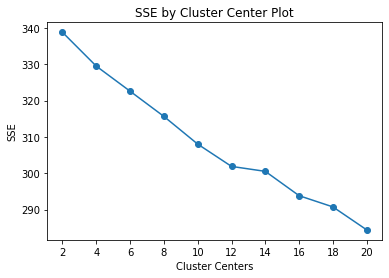

In [1466]:
find_optimal_clusters(text, 20)

In [1407]:
def find_optimal_clusters_kmean(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k)
        sse.append(kmeans.fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


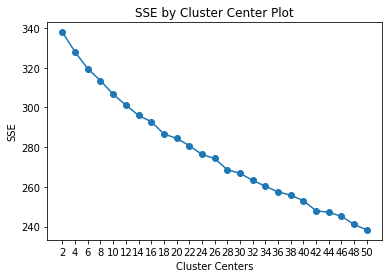

In [1496]:
find_optimal_clusters_kmean(text, 50)

In [1414]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [1497]:
kmeans = KMeans(n_clusters=42)
kmeans.fit(text)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=42, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1498]:
kmeans.labels_

array([36, 19, 31, 19, 23,  6, 14, 21, 26, 26, 14, 14,  8, 35, 16,  6, 41,
       12,  5, 20, 16, 13,  4,  4, 19, 36, 20, 15, 16, 34, 40, 15, 27, 20,
       41, 36, 40, 11, 11, 19, 18, 12, 10, 27, 21, 22,  0, 40, 33,  9, 33,
        4, 30, 30, 18, 24, 24, 14, 14, 27, 14, 16,  9, 36, 30, 23,  4,  3,
       41, 27,  3, 25, 17, 35, 26, 26, 13, 14, 30, 12,  7, 16,  9,  1,  0,
       39, 39, 30, 13, 40, 20, 13, 37,  3, 32,  9, 18,  9, 10,  9, 29,  5,
       27, 41, 18, 36, 21, 41, 40,  0, 31,  9, 35, 24,  0, 23, 22, 32, 13,
       38,  5, 29, 30,  5, 22,  2, 40, 32,  3,  0, 20, 20,  9, 37,  6,  4,
       12,  6, 31, 23, 16, 36,  9, 41,  8, 13, 17, 28, 11,  5, 12, 30,  0,
       36, 13, 13, 31, 11, 12, 12, 12, 12,  6,  3, 34, 29, 35, 19, 36, 15,
       23, 27, 26,  1, 16, 37, 21, 11, 16,  6, 13, 31, 33, 20,  7, 21, 11,
       33, 38,  9,  1, 18, 23, 28,  7, 15, 34, 11, 11, 21, 21, 40, 11, 14,
       37, 20,  4,  2, 27, 11, 12,  6, 36,  4,  8, 27,  4, 25, 16, 18,  8,
        1, 13,  4, 23,  6

In [1499]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
#plot_tsne_pca(text, clusters)
#plot_tsne_pca(text, kmeans.labels_)

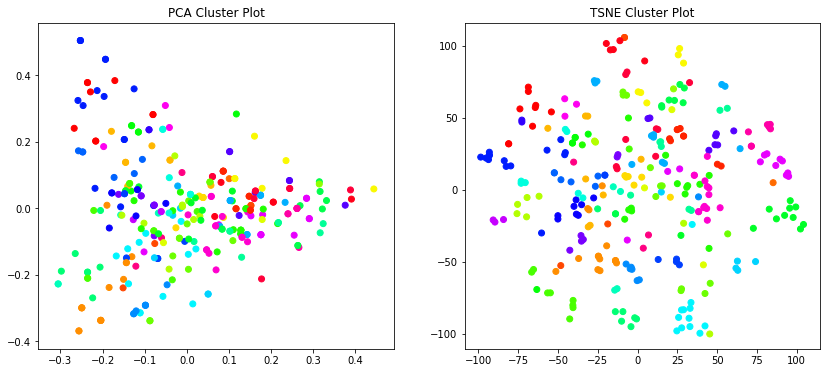

In [1500]:
plot_tsne_pca(text, kmeans.labels_)

In [1520]:
#Getting top keywords that describe the cluster
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, kmeans.labels_, tfidf.get_feature_names(), 5)


Cluster 0
headache,thermoregulation,fever,sore,throat

Cluster 1
father,heel,mutation,coma,brain

Cluster 2
body,retina,human,cancer,eye

Cluster 3
brain,nervous,muscle,cord,spinal

Cluster 4
wart,skin,condition,lymph,cancer

Cluster 5
infection,condition,toothache,erythema,mouth

Cluster 6
pressure,hypotension,human,hypothermia,blood

Cluster 7
sleep,panic,disorder,insomnia,anxiety

Cluster 8
hypothyroidism,thyroid,erythematosus,disorder,lupus

Cluster 9
stomach,infection,diarrhea,cramp,bowel

Cluster 10
mental,hallucination,mood,bipolar,disorder

Cluster 11
human,hypertension,disease,blood,kidney

Cluster 12
jaundice,disease,cirrhosis,hepatitis,liver

Cluster 13
thyroid,valve,congenital,disease,heart

Cluster 14
of,pneumonia,pancreatitis,respiratory,acute

Cluster 15
rheumatoid,stiffness,hip,joint,arthritis

Cluster 16
abuse,mood,anxiety,personality,disorder

Cluster 17
vaginal,transmitted,sexually,infection,penis

Cluster 18
gland,tumor,personality,neurofibromatosis,brain

Cluster 

In [1519]:
#Getting health condiitons in the cluster with cluster number

In [1505]:
def find_disease_clusternumber(n):
    num_ = []
    i_ = 0
    for ar in kmeans.labels_:
        if ar == n:
            #print (i_)
            num_.append(df_cluster['condition_name'][i_][0])
        i_=i_+1
    return num_

In [1517]:
#prediction example
predict_me = []
predict_me.append('type sugar blood mellitus diabetes')
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 2262,
    #stop_words = 'english'
)
tfidf.fit(df['r_disease'])
preddict_text = tfidf.transform(predict_me)
#prediction = kmeans.predict(preddict_text)
print(preddict_text)

  (0, 537)	0.5369833737331547
  (0, 493)	0.5779315133798183
  (0, 315)	0.4042074774642311
  (0, 139)	0.4042074774642311
  (0, 65)	0.22555853453300864


In [1511]:
prediction = kmeans.predict(preddict_text)

In [1512]:
print (prediction)

[36]


In [1514]:
predict_cluster=find_disease_clusternumber(36)
print(predict_cluster)
print(len(predict_cluster))

['Abdominal-aortic-aneurysm', 'Angina', 'Atherosclerosis', 'Cardiovascular-disease', 'Diabetes', 'Gestational-diabetes', 'Heart-attack', 'High-blood-sugar-hyperglycaemia', 'Low-blood-sugar-hypoglycaemia', 'Metabolic-syndrome', 'Peripheral-neuropathy', 'Prader-willi-syndrome', 'Stroke', 'Type-2-diabetes']
14
